# PROJECT 1

Submitted To: `Dr. Hasan Sajid`                                              
Submitted By: `Usman Zaheer`, Roll No: `13194`, Registration Number: `00000327700` 
RIME: `2020`  Subject: `Machine Learning`




### Problem Statement
#### Write complete code to train a linear/non-linear model for predicting corona cases in USA and world with regularization.

-  In this model, linear regression model with regularization is implemented for predicting corona cases in different countries of whole world.


#### Model: Multivariate Linear Regression Model with Regularization for Predicting Corona Cases in World.*

### Step 1:  Importing necesaary libraries for the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Useful links from where data was taken and cleaned for this specific model.

For corona cases data:
- 1) https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

For weather temperarure data:
- 2) https://www.timeanddate.com/weather/

Population density: 
- 3) https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

Human Development Index:
- 4)https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv


### Step 2: Importing csv file of World Data using pandas

`Worldwide Final` is the name of csv file which will be converted to dataframe (df) using pandas. 

In [2]:
df=pd.read_csv('Worldwide final.csv')

Imported Data named `df` 

In [3]:
df.head()

,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
0,Asia,Afghanistan,1/23/2020,0,0,0,54.42,0.498,7.0,0
1,Asia,Afghanistan,1/24/2020,1,1,0,54.42,0.498,7.0,0
2,Asia,Afghanistan,1/25/2020,2,2,0,54.42,0.498,13.0,0
3,Asia,Afghanistan,1/26/2020,3,3,0,54.42,0.498,2.0,0
4,Asia,Afghanistan,1/27/2020,4,4,0,54.42,0.498,6.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54720 entries, 0 to 54719
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CONTINENT                54720 non-null  object 
 1   LOCATION                 54720 non-null  object 
 2   DATE                     54720 non-null  object 
 3   COUNTRY_SERIES           54720 non-null  int64  
 4   DATE_CODE                54720 non-null  int64  
 5   COUNTRY_CODE             54720 non-null  int64  
 6   POPULATION DENSITY       53440 non-null  float64
 7   HUMAN_DEVELOPMENT_INDEX  52800 non-null  float64
 8   TEMPERATURES             54720 non-null  float64
 9   CASES                    54720 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 4.2+ MB


### Step 3: Creating a column named Xo which is bias term

In [5]:
dfx=pd.Series(1,index=df.index,name='Xo')
dfx.head()

0    1
1    1
2    1
3    1
4    1
Name: Xo, dtype: int64

In [6]:
f_df=pd.concat([dfx,df],axis=1)
f_df.head()

,Xo,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
0,1,Asia,Afghanistan,1/23/2020,0,0,0,54.42,0.498,7.0,0
1,1,Asia,Afghanistan,1/24/2020,1,1,0,54.42,0.498,7.0,0
2,1,Asia,Afghanistan,1/25/2020,2,2,0,54.42,0.498,13.0,0
3,1,Asia,Afghanistan,1/26/2020,3,3,0,54.42,0.498,2.0,0
4,1,Asia,Afghanistan,1/27/2020,4,4,0,54.42,0.498,6.0,0


In [36]:
f_df["DATE_CODE"].max(), f_df["DATE_CODE"].min(), f_df["COUNTRY_CODE"].max(), f_df["COUNTRY_CODE"].min(), f_df["POPULATION DENSITY"].max(), f_df["POPULATION DENSITY"].min(), f_df["HUMAN_DEVELOPMENT_INDEX"].max(), f_df["HUMAN_DEVELOPMENT_INDEX"].min(), f_df["TEMPERATURES"].max(), f_df["TEMPERATURES"].min()

(319, 0, 170, 0, 19347.5, 1.98, 0.953, 0.354, 52.0, -16.0)

### Step 4: Cleaning data

##### Checking Nan values in data

In [7]:
f_df.isna().sum()

Xo                            0
CONTINENT                     0
LOCATION                      0
DATE                          0
COUNTRY_SERIES                0
DATE_CODE                     0
COUNTRY_CODE                  0
POPULATION DENSITY         1280
HUMAN_DEVELOPMENT_INDEX    1920
TEMPERATURES                  0
CASES                         0
dtype: int64

In [8]:
f_df["HUMAN_DEVELOPMENT_INDEX"]=f_df["HUMAN_DEVELOPMENT_INDEX"].fillna(f_df["HUMAN_DEVELOPMENT_INDEX"].mean())

In [9]:
f_df["POPULATION DENSITY"]=f_df["POPULATION DENSITY"].fillna(f_df["POPULATION DENSITY"].mean())

In [10]:
f_df.head()

,Xo,CONTINENT,LOCATION,DATE,COUNTRY_SERIES,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES,CASES
0,1,Asia,Afghanistan,1/23/2020,0,0,0,54.42,0.498,7.0,0
1,1,Asia,Afghanistan,1/24/2020,1,1,0,54.42,0.498,7.0,0
2,1,Asia,Afghanistan,1/25/2020,2,2,0,54.42,0.498,13.0,0
3,1,Asia,Afghanistan,1/26/2020,3,3,0,54.42,0.498,2.0,0
4,1,Asia,Afghanistan,1/27/2020,4,4,0,54.42,0.498,6.0,0


In [11]:
f_df.isna().sum()

Xo                         0
CONTINENT                  0
LOCATION                   0
DATE                       0
COUNTRY_SERIES             0
DATE_CODE                  0
COUNTRY_CODE               0
POPULATION DENSITY         0
HUMAN_DEVELOPMENT_INDEX    0
TEMPERATURES               0
CASES                      0
dtype: int64

### Step 5: Creating features `x` and prediction label `y` 

In [12]:
x=f_df.drop(["CONTINENT",'LOCATION', 'DATE', 'COUNTRY_SERIES','CASES'], axis=1)


`x` is our features.

Features information:

  Here, We have 6 features:

    *1) Xo (Bias Term) = 1
    *2) DATE_CODE = In this model "date" is numerically coded. For example: 
        Model date starts from 23 January 2020 and ends at 7th December 2020.
        *Here: 23/01/2020 is 0 and 7th December is 319.
    *3) COUNTRY_CODE: Country codes are also numerically coded. For example:
         *Here: 1 = Afghanistan, 2= Albania and 170=Zimbabwe.
    *4) HUMAN_DEVELOPMENT_INDEX: Average Human development index of particular state  
    *5) POPULATION_DENSITY: Population Density of particular country. 
    *6) TEMPERATURES: Tempearures in C of particular country at particular date.  

In [13]:
x.head()


,Xo,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES
0,1,0,0,54.42,0.498,7.0
1,1,1,0,54.42,0.498,7.0
2,1,2,0,54.42,0.498,13.0
3,1,3,0,54.42,0.498,2.0
4,1,4,0,54.42,0.498,6.0


`y` is our prediction label.

In [14]:
y=f_df['CASES']

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CASES, dtype: int64

### Step 6: Normalization/ Scaling of features

In [16]:
for j in range(0,len(x.columns)):
    x= (x-x.min())/(x.max()-x.min())

In [17]:
x.head()

,Xo,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES
0,NaN,0.000000,0.0,0.002711,0.240401,0.338235
1,NaN,0.003135,0.0,0.002711,0.240401,0.338235
2,NaN,0.006270,0.0,0.002711,0.240401,0.426471
3,NaN,0.009404,0.0,0.002711,0.240401,0.264706
4,NaN,0.012539,0.0,0.002711,0.240401,0.323529


In [18]:
x["Xo"]=x["Xo"].fillna(1)

In [19]:
x.head()

,Xo,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES
0,1.0,0.000000,0.0,0.002711,0.240401,0.338235
1,1.0,0.003135,0.0,0.002711,0.240401,0.338235
2,1.0,0.006270,0.0,0.002711,0.240401,0.426471
3,1.0,0.009404,0.0,0.002711,0.240401,0.264706
4,1.0,0.012539,0.0,0.002711,0.240401,0.323529


### Step 7: Splitting dataframe into training(60%) validation(20%) and testing data (20%) 

In [20]:
Train_split=round(0.6*len(f_df))
Valid_split=round(Train_split+0.20*len(f_df))

x_train,y_train=x[:Train_split],y[:Train_split]
x_valid, y_valid=x[Train_split:Valid_split],y[Train_split:Valid_split]
x_test, y_test=x[Valid_split:],y[Valid_split:]

* x_train, y_train are features and label of training set.
* x_valid, y_valid are features and label of validation set.
* x_test, y_test are features and label of test set.


In [21]:
len(x_train), len(y_train), len(x_valid), len(y_valid), len(x_test),len(y_test)

(32832, 32832, 10944, 10944, 10944, 10944)

In [22]:
y_train.dtypes

dtype('int64')

In [23]:
x_train.head()

,Xo,DATE_CODE,COUNTRY_CODE,POPULATION DENSITY,HUMAN_DEVELOPMENT_INDEX,TEMPERATURES
0,1.0,0.000000,0.0,0.002711,0.240401,0.338235
1,1.0,0.003135,0.0,0.002711,0.240401,0.338235
2,1.0,0.006270,0.0,0.002711,0.240401,0.426471
3,1.0,0.009404,0.0,0.002711,0.240401,0.264706
4,1.0,0.012539,0.0,0.002711,0.240401,0.323529


# Training Code

### Step 8: Initiating Thetas(Model Parameters) and  defining Hypothesis for Linear Regression

As in this model Linear regression is applied, so Hypothesis is Thetas*x. Here:

* Thetas= Model Parameters or weights for each feature.
* x_train= Features of model 
In this model, there are total 6 feaures including the bias term Xo. So initiating 6 thetas of initiation value = 0.

In [24]:
Thetas= np.array([0]*len(x_train.columns))

In [25]:
Thetas

array([0, 0, 0, 0, 0, 0])

#### Defining Hypothesis

In [26]:
def Hypothesis(Thetas,x_train):
    return Thetas*x_train

m = length of training set

In [27]:
m =len(x_train)

### Step 9: Defining Cost function

Cost function is basically the differnce between prediction by the model and the predicton label.Here, Regularization is also applied with Cost Function.
        
        * lambda_ is the regulzarization parameter.

In [28]:
def Cost_Function(x_train,y_train,Thetas,lambda_):
    H=Hypothesis(Thetas,x_train)
    H=np.sum(H,axis=1)
    Cost=(np.sum(np.power((H-y_train),2))+lambda_*np.sum(np.power(Thetas[1:],2)))/(2*m)
    return Cost

In [29]:
n=len(x_valid)

In [30]:
def Cost_Function_valid(x_valid,y_valid,Thetas,lambda_):
    H=Hypothesis(Thetas,x_valid)
    H=np.sum(H,axis=1)
    Cost=(np.sum(np.power((H-y_valid),2))+lambda_*np.sum(np.power(Thetas[1:],2)))/(2*n)
    return Cost

### Step 10: Gradient Descent

Gradient Descenet is used to find the minimum values of thetas, so that our cost will be minimum. Mimimum cost indicates that the difference between our prediction and actual label is very low. 
Here, Regularization is also applied with Gradient Descnet to prevent overfitting.



#### Defining Gradient Descent

In [31]:
def Gradient_Descent(x_train, y_train, Thetas,lambda_, alpha, iterations):
    J_train = []  #cost of training set in each iterations is saved in this list
    J_valid = []  #cost of valid set in each iterations is saved in this list
    J_test =  []  #cost of test set in each iterations is saved in this list
    temp_var = 0
    while temp_var < iterations:        
        H = Hypothesis(Thetas, x_train)
        H = np.sum(H, axis=1)
        for  i in range(0, len(x_train.columns)):
            if i==0:
                Thetas[0]=Thetas[0]-alpha*(sum((H-y_train)*x_train.iloc[:,0])/(m))
            else:
                Thetas[i] = Thetas[i]*(1-alpha*(lambda_/m)) - alpha*(sum((H-y_train)*x_train.iloc[:,i])/(m))
                
                #thethas[i] = thethas[i] - alpha*(sum((H-y_train)*x_train.iloc[:,i])/(m))
        j_t = Cost_Function(x_train,y_train, Thetas,lambda_)
        J_train.append(j_t)
        j_v = Cost_Function_valid(x_valid,y_valid, Thetas,lambda_)
        J_valid.append(j_v)
        j_te = Cost_Function_valid(x_test,y_test, Thetas,lambda_)
        J_test.append(j_te)
        temp_var += 1
    return J_train,J_valid,J_test, j_t,j_v,j_te, Thetas

#### Calculating cost using gradient descent with the following parameters:
* alpha is learning rate =0.01 
* Iterations=1000
* lambda_ is regularization parameter= 10

Here, when we put 
        
        * lambda_ = 0, there will no regularizarion
        * Iterations = Number of iterations for the loop

In [32]:
J_train,J_valid,J_test, j_t,j_v,j_te, Thetas = Gradient_Descent(x_train,y_train,Thetas,10,0.01,1000)

#### Thetas (paramters) of our model on training data are as follows:

In [37]:
Thetas

array([ 137, 1410,   84,    0,  322,    0])

### Step 11: Calculating Predictions using Hypothesis function and model parameters.

`py_train` is our prediction and we are applying our model parameters on training set to check the predictions and accuracy of our model.

In [38]:
py_train= Hypothesis(Thetas,x_train)
py_train= np.sum(py_train,axis=1)

In [39]:
py_train

0         214.409015
1         218.829078
2         223.249140
3         227.669203
4         232.089266
            ...     
32827    1103.187116
32828    1107.607179
32829    1112.027242
32830    1116.447305
32831    1120.867367
Length: 32832, dtype: float64

### Step 11.1: Result Visualization

#### A)  Graph of Cost vs Iterations to check the working of our model. 
#### B)  Scattter plot for our predictions in training set  and y_train.

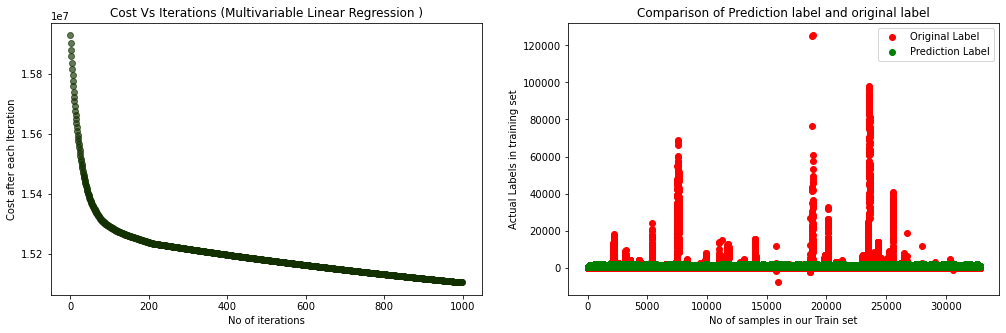

In [40]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,1000)),y=J_train,color='#133000',alpha=0.65)
ax1.set(xlabel='No of iterations',
      ylabel='Cost after each Iteration',
      title='Cost Vs Iterations (Multivariable Linear Regression )')
ax2.scatter(x=list(range(0,len(x_train))),y=y_train,color='red',label='Original Label')
ax2.scatter(x=list(range(0,len(x_train))),y=py_train,color='green',label='Prediction Label')
ax2.set(xlabel='No of samples in our Train set',
       ylabel='Actual Labels in training set',
       title='Comparison of Prediction label and original label')
ax2.legend();

### Step 11.2: Calculating Mean Absolute Error on train data set

In [41]:
MAE_train=np.sum(np.absolute(y_train-py_train))/len(x_train)
MAE_train

1599.0524808782307

Mean absolute Error is `1599.9` for training set. It means that model is predicting `1599` values wrong from actual cases

### Step 12: Applying model paramters on validation data set

`py_validation` is our prediction on validation set and we are applying our model parameters on validation set to check the predictions and accuracy of our model.

In [42]:
py_validation= Hypothesis(Thetas,x_valid)
py_validation= np.sum(py_validation,axis=1)

In [43]:
py_validation

32832    1125.287430
32833    1129.707493
32834    1134.127555
32835    1138.547618
32836    1142.967681
            ...     
43771    1551.775970
43772    1556.196033
43773    1560.616096
43774    1565.036158
43775    1569.456221
Length: 10944, dtype: float64

### Step 12.1 Result Visualization for validation data

#### Creating  scattter plots for our predictions on validation data and y_valid label.

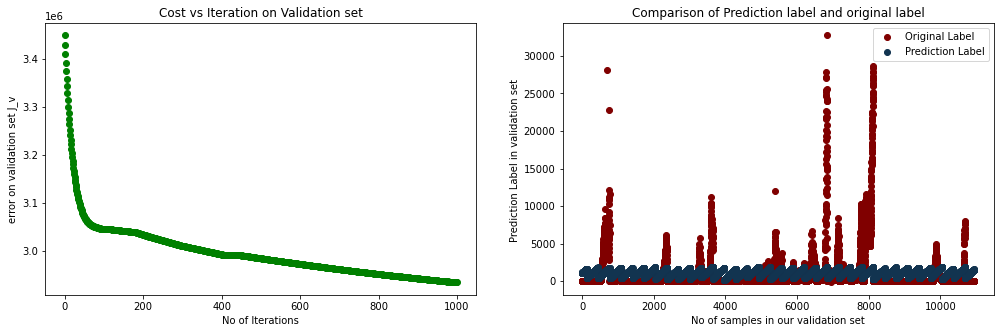

In [44]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,1000)),y=J_valid,color="green")
ax1.set(xlabel="No of Iterations", ylabel = "error on validation set J_v", title ="Cost vs Iteration on Validation set")
ax2.scatter(x=list(range(0,len(x_valid))),y=y_valid,color='maroon',label='Original Label')
ax2.scatter(x=list(range(0,len(x_valid))),y=py_validation,color='#123450',label='Prediction Label')
ax2.set(xlabel='No of samples in our validation set',
       ylabel='Prediction Label in validation set ',
       title='Comparison of Prediction label and original label')
ax2.legend();

### Step 12.2 Mean Absolute Error for validation set

In [45]:
MAE_validation=np.sum(np.absolute(y_valid-py_validation))/len(x_valid)
MAE_validation

1285.6464488275617

Mean absolute Error is `1285.7` for validation set. 
It means that model is predicting `1285` values wrong from actual cases in validation set.

### Step 13: Applying model paramters on test data set to get predictions

`py_test` is our prediction on validation set and we are applying our model parameters on test set to check the predictions and accuracy of our model.

In [46]:
py_test= Hypothesis(Thetas,x_test)
py_test= np.sum(py_test,axis=1)

In [47]:
py_test.head()

43776    1573.876284
43777    1578.296347
43778    1582.716409
43779    1587.136472
43780    1591.556535
dtype: float64

### Step 13. 1 Result Visualization for test data

#### Creating  scattter plots for our predictions on test and y_test label.

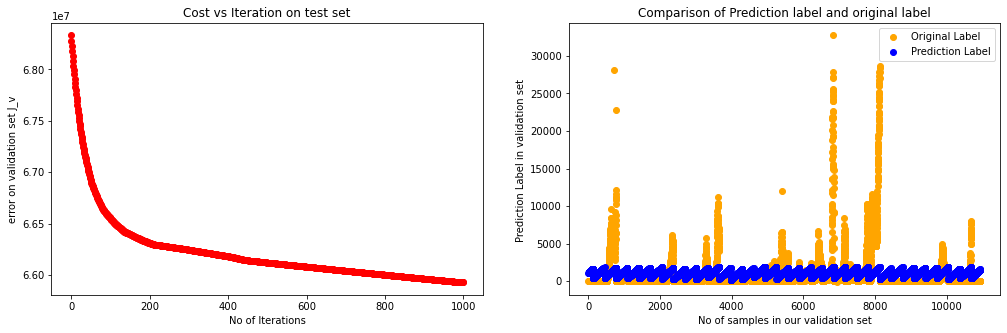

In [48]:
fig,(ax1,ax2)=plt.subplots(figsize=(17,5),
                          nrows=1,
                          ncols=2)
ax1.scatter(x=list(range(0,1000)),y=J_test,color="red")
ax1.set(xlabel="No of Iterations", ylabel = "error on validation set J_v", title ="Cost vs Iteration on test set")
ax2.scatter(x=list(range(0,len(x_valid))),y=y_valid,color='orange',label='Original Label')
ax2.scatter(x=list(range(0,len(x_valid))),y=py_validation,color='blue',label='Prediction Label')
ax2.set(xlabel='No of samples in our validation set',
       ylabel='Prediction Label in validation set ',
       title='Comparison of Prediction label and original label')
ax2.legend();

###  Step 13. 2 Mean Absolute Error on test set

In [49]:
MAE_test=np.sum(np.absolute(y_test-py_test))/len(x_test)
MAE_test

2638.1314938164996

Mean absolute Error is `2638.0` for test set. It means that model is predicting `2638` values wrong from actual cases in test set.

### PLOT FOR ALL THREE ERRORS

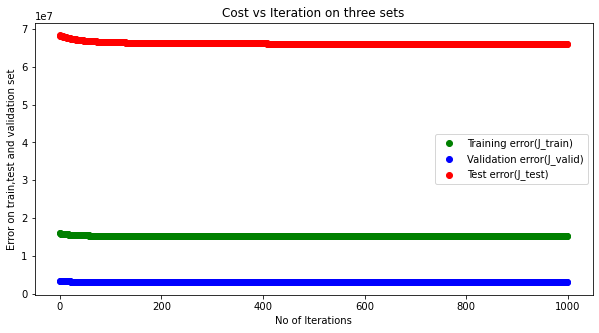

In [50]:
fig,(ax1)=plt.subplots(figsize=(10,5),
                          nrows=1,
                          ncols=1)
ax1.scatter(x=list(range(0,1000)),y=J_train,color='green',label='Training error(J_train)')
ax1.scatter(x=list(range(0,1000)),y=J_valid,color='blue',label='Validation error(J_valid)')
ax1.scatter(x=list(range(0,1000)),y=J_test,color="red",label='Test error(J_test)')
ax1.set(xlabel="No of Iterations", ylabel = "Error on train,test and validation set", title ="Cost vs Iteration on three sets")
ax1.legend();